## Let's plot the gordon network atlas

#### # networks that we care about
markdown
#VSC-961484b8
markdown
## Let's plot the gordon network atlas

#### # networks that we care about
#### dim 1: 10, 1, 13, 4
#### dim 3: 3, 1, 11, 4
#### networks = [10, 1, 13, 4]
#### network_map = {10: "CinguloOperc", 1: "Default", 13: "DorsalAttn", 4: "Visual"}

#### '''networks = [3, 1, 11, 4]
#### network_map = {3: "SensoriMouth", 1: "Default", 11: "VentralAttn", 4: "Visual"}'''

<!-- # Define network pairs for each map
network_pairs = [
    (10, 1),  # CinguloOperc + Default
    (1, 11),  # Default + VentralAttn
    (1, 1),  # Default + Default
    (1, 4),  # Default + Visual
    (4, 4),  # Visual + Visual
    (1, 3),  # Default + SensoriMouth
    (11, 4)  # VentralAttn + Visual
]

# Labels
network_map = {
    10: "CinguloOperc",
    1: "Default",
    11: "VentralAttn",
    4: "Visual",
    3: "SensoriMouth",
} -->

if not exists(nii_dir):
    makedirs(nii_dir)

In [3]:
# importing the tools we'll use throughout the rest of the script
# sys is system tools, should already be installed
import sys
import json

# pandas is a dataframe-managing library and it's the absolute coolest
import pandas as pd

# numpy is short for "numerical python" and it does math
import numpy as np

# seaborn is a plotting library named after a character from West Wing
# it's kind of like python's ggplot
import seaborn as sns

# nibabel handles nifti images
import nibabel as nib

# os is more system tools, should also already be installed
# we're importing tools for verifying and manipulating file paths/directories
from os.path import join, exists, isdir
from os import makedirs

# nilearn makes the best brain plots
# and their documentation/examples are so, so handy
# https://nilearn.github.io/stable/auto_examples/01_plotting/index.html
from nilearn import plotting, surface, datasets

# matplotlib is the backbone of most python plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

# gridspec helps us put lots of panels on one figure
from PIL import Image

from neuromaps import transforms
from neuromaps.datasets import fetch_fslr

from gradec.utils import _zero_medial_wall

from surfplot import Plot
%matplotlib inline

In [4]:
fig_dir = "./derivatives/none-reduced/figures"
nii_dir = "./derivatives/none-reduced/nifti"

# Create directory if it doesn't exist
if not exists(fig_dir):
    makedirs(fig_dir)

if not exists(nii_dir):
    makedirs(nii_dir)

In [5]:

CMAP = "Spectral_r"

def plot_surf(nii_img_thr, mask_contours=None, vmax=8, cmap=CMAP):
    map_lh, map_rh = transforms.mni152_to_fslr(nii_img_thr, fslr_density="32k")
    map_lh, map_rh = _zero_medial_wall(
        map_lh,
        map_rh,
        space="fsLR",
        density="32k",
    )
    # midthickness

    surfaces = fetch_fslr(density="32k")
    lh, rh = surfaces["inflated"]
    sulc_lh, sulc_rh = surfaces["sulc"]

    p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")
    p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)
    p.add_layer(
        {"left": map_lh, "right": map_rh},
        cmap=cmap,
        cbar=False,
        color_range=(-vmax, vmax),
    )
    if mask_contours:
        mask_lh, mask_rh = transforms.mni152_to_fslr(mask_contours, fslr_density="32k")
        mask_lh, mask_rh = _zero_medial_wall(
            mask_lh,
            mask_rh,
            space="fsLR",
            density="32k",
        )
        mask_arr_lh = mask_lh.agg_data()
        mask_arr_rh = mask_rh.agg_data()
        countours_lh = np.zeros_like(mask_arr_lh)
        countours_lh[mask_arr_lh != 0] = 1
        countours_rh = np.zeros_like(mask_arr_rh)
        countours_rh[mask_arr_rh != 0] = 1

        colors = [(0, 0, 0, 0)]
        contour_cmap = ListedColormap(colors, "regions", N=1)
        line_cmap = ListedColormap(["black"], "regions", N=1)
        p.add_layer(
            {"left": countours_lh, "right": countours_rh},
            cmap=line_cmap,
            as_outline=True,
            cbar=False,
        )
        p.add_layer(
            {"left": countours_lh, "right": countours_rh},
            cmap=contour_cmap,
            cbar=False,
        )

    return p.build()

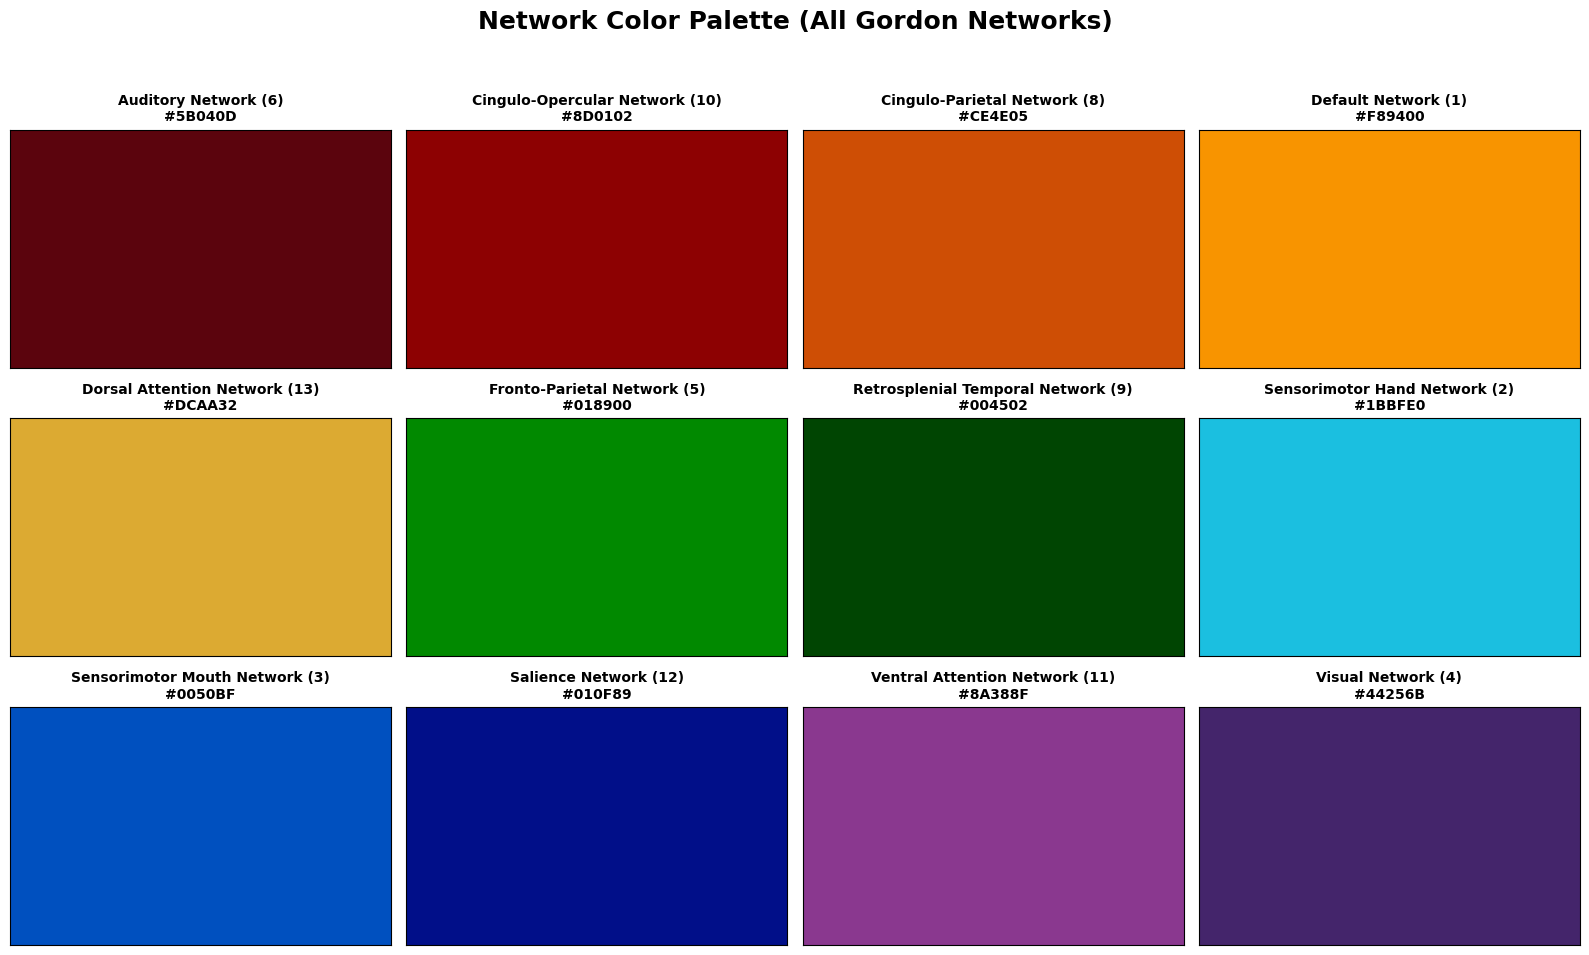

In [6]:
# Define the number of colors in the colormap
num_colors = 1000

# Full set of network hex colors (including non-significant networks)
network_hex = {
    6: "#5B040D",   # Auditory Network
    10: "#8D0102",  # Cingulo-opercular Network
    8: "#CE4E05",   # Cingulo-parietal Network
    1: "#F89400",   # Default Network
    13: "#DCAA32",  # Dorsal Attention Network
    5: "#018900",   # Fronto-parietal Network
    9: "#004502",   # Retrosplenial Temporal Network
    2: "#1BBFE0",   # Sensorimotor Hand Network
    3: "#0050BF",   # Sensorimotor Mouth Network
    12: "#010F89",  # Salience Network
    11: "#8A388F",  # Ventral Attention Network
    4: "#44256B"    # Visual Network
}

# Friendly names for display (keeps the same naming used elsewhere)
network_full_names = {
    6: "Auditory Network",
    10: "Cingulo-Opercular Network",
    8: "Cingulo-Parietal Network",
    1: "Default Network",
    13: "Dorsal Attention Network",
    5: "Fronto-Parietal Network",
    9: "Retrosplenial Temporal Network",
    2: "Sensorimotor Hand Network",
    3: "Sensorimotor Mouth Network",
    12: "Salience Network",
    11: "Ventral Attention Network",
    4: "Visual Network"
}

# Abbreviations for plotting and legends (short labels)
# Use these abbreviated labels in titles and legends where space is limited
network_abbrev = {
    6: "AN",
    10: "CON",
    8: "CPN",
    1: "DN",
    13: "DAN",
    5: "FPN",
    9: "RTN",
    2: "SHN",
    3: "SMN",
    12: "SN",
    11: "VAN",
    4: "VN",
}

# Create a LinearSegmentedColormap for each network (solid color mapped)
from matplotlib.colors import LinearSegmentedColormap
cmap_map = {}
for net, hx in network_hex.items():
    cmap_map[net] = LinearSegmentedColormap.from_list(f"net_{net}", [hx, hx], N=num_colors)

# Display all network colormaps in a 3x4 grid
networks_display = [6, 10, 8, 1, 13, 5, 9, 2, 3, 12, 11, 4]

grid_rows = 3
grid_cols = 4
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, 10))
fig.suptitle("Network Color Palette (All Gordon Networks)", fontsize=18, fontweight='bold')

for i, net in enumerate(networks_display):
    row, col = i // grid_cols, i % grid_cols
    ax = axes[row, col]

    # Create simple gradient to show the solid color
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    ax.imshow(gradient, aspect='auto', cmap=cmap_map[net])
    ax.set_xlim(0, 255)

    # Title shows both network name and hex code for clarity
    ax.set_title(f"{network_full_names[net]} ({net})\n{network_hex[net]}", fontweight='bold', fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [7]:
# fetch once
surf = datasets.fetch_surf_fsaverage()

# load your full Gordon atlas
img = nib.load("./gordon_networks_222.nii")
data = img.get_fdata()
affine = img.affine
hdr = img.header

# networks that we care about
# dim 1: 10, 1, 13, 4
# dim 3: 3, 1, 11, 4
networks = [10, 1, 13, 4, 3, 11]

# Reuse canonical full display names (defined in previous cell)
network_map = network_full_names

# Ensure file-safe names include all networks
network_file_map = {
    6: "Auditory",
    10: "CinguloOpercular",
    8: "CinguloParietal",
    1: "Default",
    13: "DorsalAttention",
    5: "FrontoParietal",
    9: "RetrosplenialTemporal",
    2: "SensorimotorHand",
    3: "Sensorimotor",
    12: "Salience",
    11: "VentralAttention",
    4: "Visual",
}

# Define number of colors for the colormaps
num_colors = 256

# Use the existing cmap_map to construct network_colors so plotting calls stay the same
network_colors = {net: cmap_map[net] for net in network_file_map.keys()}

In [8]:
# Save each network as a binary NIfTI ROI
for net in networks:
    network_name = network_map[net]  # Formal name for display
    file_name = network_file_map[net]  # File-safe name for saving
    output_path = join(nii_dir, f"{file_name}_ROI.nii.gz")
    
    # Check if file already exists
    if exists(output_path):
        print(f"✓ {network_name} ROI already exists at {output_path}")
        continue
    
    # Create binary mask: 1 where data==net, 0 elsewhere
    mask_vol = (data == net).astype(np.uint8)
    mask_img = nib.Nifti1Image(mask_vol, affine, hdr)
    
    # Save NIfTI file
    nib.save(mask_img, output_path)
    print(f"✓ Saved {network_name} ROI to {output_path}")

✓ Cingulo-Opercular Network ROI already exists at ./derivatives/none-reduced/nifti/CinguloOpercular_ROI.nii.gz
✓ Default Network ROI already exists at ./derivatives/none-reduced/nifti/Default_ROI.nii.gz
✓ Dorsal Attention Network ROI already exists at ./derivatives/none-reduced/nifti/DorsalAttention_ROI.nii.gz
✓ Visual Network ROI already exists at ./derivatives/none-reduced/nifti/Visual_ROI.nii.gz
✓ Sensorimotor Mouth Network ROI already exists at ./derivatives/none-reduced/nifti/Sensorimotor_ROI.nii.gz
✓ Ventral Attention Network ROI already exists at ./derivatives/none-reduced/nifti/VentralAttention_ROI.nii.gz


✓ Saved Cingulo-Opercular Network surface plot to ./derivatives/none-reduced/figures/CinguloOpercular_surface_plot.png


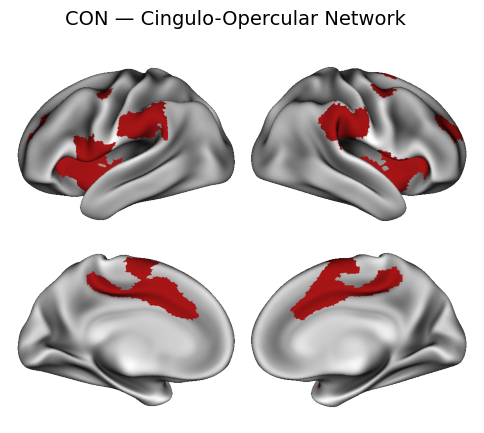

✓ Saved Default Network surface plot to ./derivatives/none-reduced/figures/Default_surface_plot.png


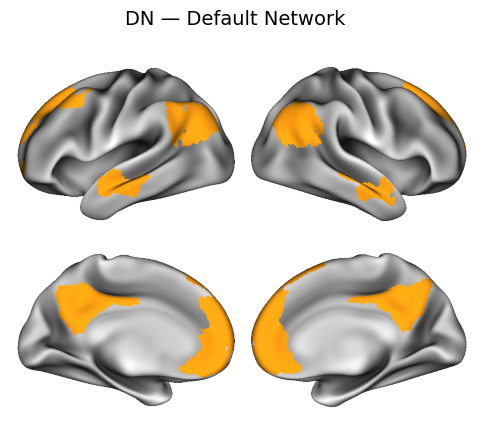

✓ Saved Dorsal Attention Network surface plot to ./derivatives/none-reduced/figures/DorsalAttention_surface_plot.png


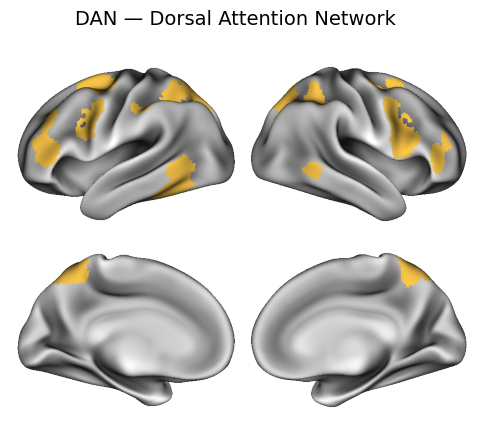

✓ Saved Visual Network surface plot to ./derivatives/none-reduced/figures/Visual_surface_plot.png


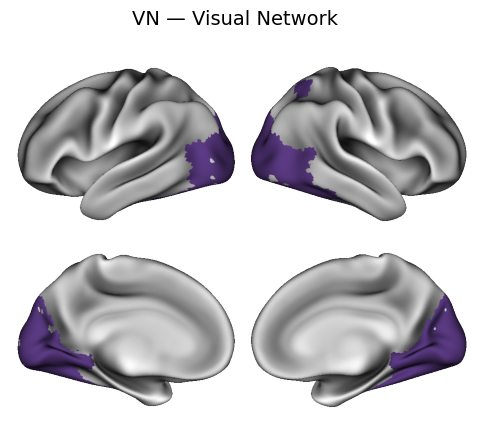

✓ Saved Sensorimotor Mouth Network surface plot to ./derivatives/none-reduced/figures/Sensorimotor_surface_plot.png


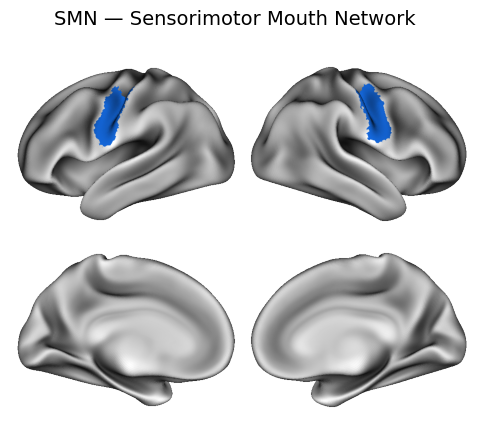

✓ Saved Ventral Attention Network surface plot to ./derivatives/none-reduced/figures/VentralAttention_surface_plot.png


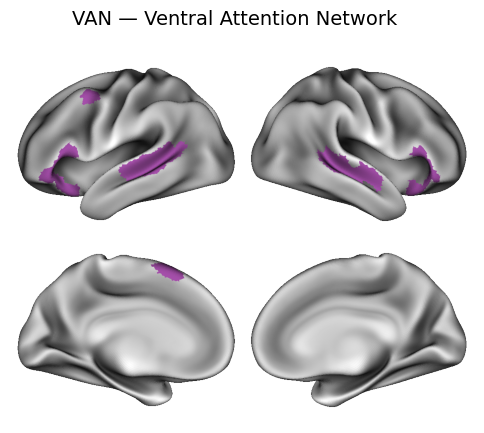

In [9]:
# Load and plot each binary mask using plot_surf function
for net in networks:
    network_name = network_map.get(net, f"Network {net}")  # Formal name for display
    file_name = network_file_map.get(net, f"net_{net}")  # File-safe name for loading
    roi_path = join(nii_dir, f"{file_name}_ROI.nii.gz")

    if not exists(roi_path):
        print(f"⚠ Warning: {roi_path} not found — skipping {network_name}")
        continue

    # Load the saved ROI
    roi_img = nib.load(roi_path)

    # Get the color for this network from the canonical cmap_map (fallback to cmap_map[1] if missing)
    network_cmap = cmap_map.get(net, list(cmap_map.values())[0])

    # Plot using plot_surf function with FSL surfaces
    fig = plot_surf(
        nii_img_thr=roi_img,
        vmax=1,  # Binary mask has values 0 and 1
        cmap=network_cmap,
    )

    # Add title to the plot — include abbreviation if available
    abbr = network_abbrev.get(net, network_name)
    fig.suptitle(f"{abbr} — {network_name}", y=0.95, fontsize=14)

    # Save as high-resolution PNG (using file-safe name)
    output_filename = f"{file_name}_surface_plot.png"
    output_path = join(fig_dir, output_filename)
    fig.savefig(output_path, dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    print(f"✓ Saved {network_name} surface plot to {output_path}")

    plt.show()


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Creating combined network visualizations...

Creating combined visualization: Cingulo-Opercular Network + Default Network
✓ Saved Cingulo-Opercular Network + Default Network surface plot to ./derivatives/none-reduced/figures/CinguloOpercular_Default_combined_surface_plot.png
✓ Saved Cingulo-Opercular Network + Default Network surface plot to ./derivatives/none-reduced/figures/CinguloOpercular_Default_combined_surface_plot.png


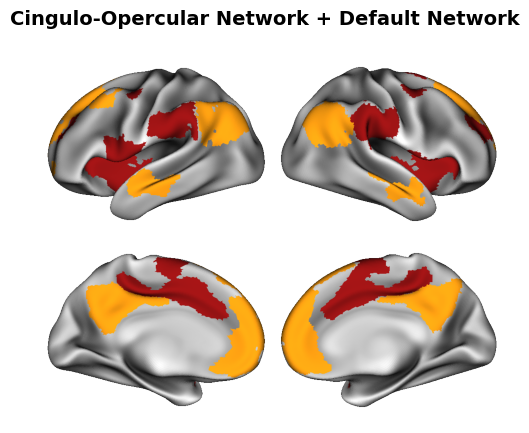

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Default Network + Dorsal Attention Network
✓ Saved Default Network + Dorsal Attention Network surface plot to ./derivatives/none-reduced/figures/Default_DorsalAttention_combined_surface_plot.png
✓ Saved Default Network + Dorsal Attention Network surface plot to ./derivatives/none-reduced/figures/Default_DorsalAttention_combined_surface_plot.png


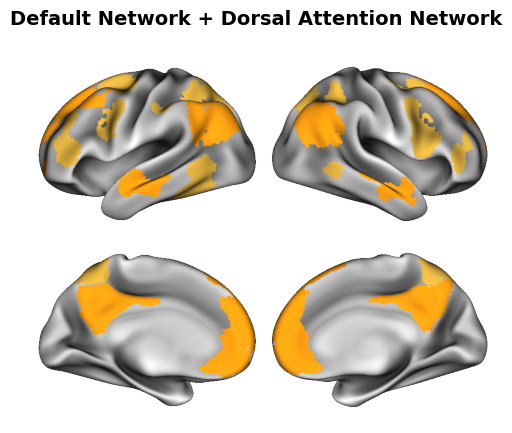

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Default Network + Visual Network
✓ Saved Default Network + Visual Network surface plot to ./derivatives/none-reduced/figures/Default_Visual_combined_surface_plot.png
✓ Saved Default Network + Visual Network surface plot to ./derivatives/none-reduced/figures/Default_Visual_combined_surface_plot.png


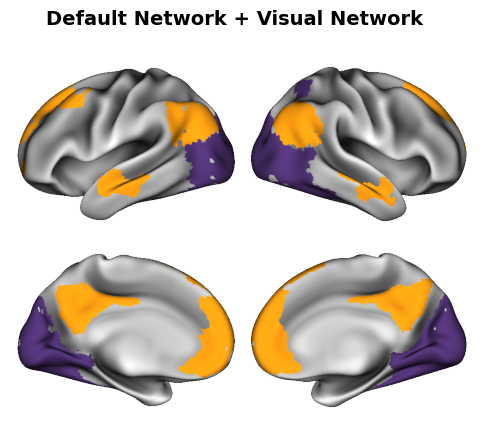

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Default Network + Sensorimotor Mouth Network
✓ Saved Default Network + Sensorimotor Mouth Network surface plot to ./derivatives/none-reduced/figures/Default_Sensorimotor_combined_surface_plot.png
✓ Saved Default Network + Sensorimotor Mouth Network surface plot to ./derivatives/none-reduced/figures/Default_Sensorimotor_combined_surface_plot.png


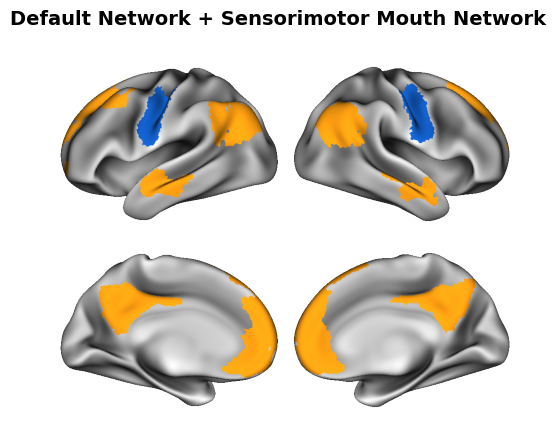

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Ventral Attention Network + Visual Network
✓ Saved Ventral Attention Network + Visual Network surface plot to ./derivatives/none-reduced/figures/VentralAttention_Visual_combined_surface_plot.png
✓ Saved Ventral Attention Network + Visual Network surface plot to ./derivatives/none-reduced/figures/VentralAttention_Visual_combined_surface_plot.png


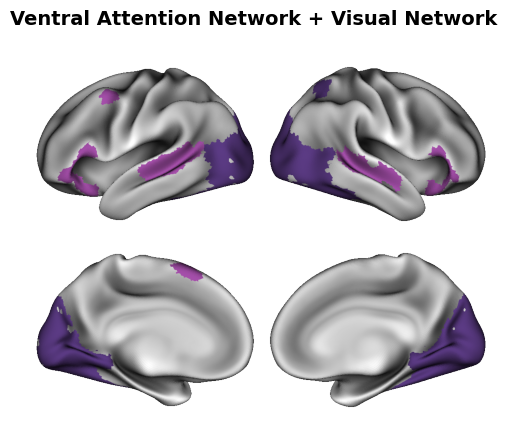

In [10]:
# Create combined visualizations for multiple network pairs
print("Creating combined network visualizations...")


# Define all network pairs to visualize
network_pairs = [
    (10, 1),   # Cingulo-Opercular + Default
    (1, 13),   # Default + Dorsal Attention
    (1, 4),    # Default + Visual
    (1, 3),    # Default + Sensorimotor
    (11, 4)    # Ventral Attention + Visual
]

# Get surfaces once
surfaces = fetch_fslr(density="32k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces["sulc"]

for net1, net2 in network_pairs:
    print(f"\nCreating combined visualization: {network_map[net1]} + {network_map[net2]}")
    
    # Create individual binary masks for each network
    net1_volume = np.zeros_like(data)
    net2_volume = np.zeros_like(data)
    
    net1_volume[data == net1] = 1
    net2_volume[data == net2] = 1
    
    # Create NIfTI images for each network
    net1_img = nib.Nifti1Image(net1_volume, affine, hdr)
    net2_img = nib.Nifti1Image(net2_volume, affine, hdr)
    
    # Transform both networks to surface space
    net1_lh, net1_rh = transforms.mni152_to_fslr(net1_img, fslr_density="32k")
    net1_lh, net1_rh = _zero_medial_wall(net1_lh, net1_rh, space="fsLR", density="32k")
    
    net2_lh, net2_rh = transforms.mni152_to_fslr(net2_img, fslr_density="32k")
    net2_lh, net2_rh = _zero_medial_wall(net2_lh, net2_rh, space="fsLR", density="32k")
    
    # Create plot with multiple layers
    p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")
    
    # Add sulcal depth as base layer
    p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)
    
    # Add first network layer
    p.add_layer(
        {"left": net1_lh, "right": net1_rh},
        cmap=network_colors[net1],
        cbar=False,
        color_range=(0, 1),
    )
    
    # Add second network layer
    p.add_layer(
        {"left": net2_lh, "right": net2_rh},
        cmap=network_colors[net2],
        cbar=False,
        color_range=(0, 1),
    )
    
    # Build the figure
    fig = p.build()
    
    # Create title with network names and colors
    net1_name = network_map[net1].split(' (')[0]  # Remove abbreviation
    net2_name = network_map[net2].split(' (')[0]  # Remove abbreviation
    
    fig.suptitle(f"{net1_name} + {net2_name}", 
                 y=0.95, fontsize=14, fontweight='bold')
    
    # Save the combined visualization
    net1_file = network_file_map[net1]
    net2_file = network_file_map[net2]
    combined_filename = f"{net1_file}_{net2_file}_combined_surface_plot.png"
    combined_path = join(fig_dir, combined_filename)
    fig.savefig(combined_path, dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    print(f"✓ Saved {net1_name} + {net2_name} surface plot to {combined_path}")
    
    plt.show()

Creating composite image from individual PNG files...


/var/folders/w7/tr80j6dx7kz1xqvddnxtqtzr0000gn/T/ipykernel_12909/583908003.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Saved composite 2x3 grid image to ./derivatives/none-reduced/figures/Significant_Gordon_Nets.png


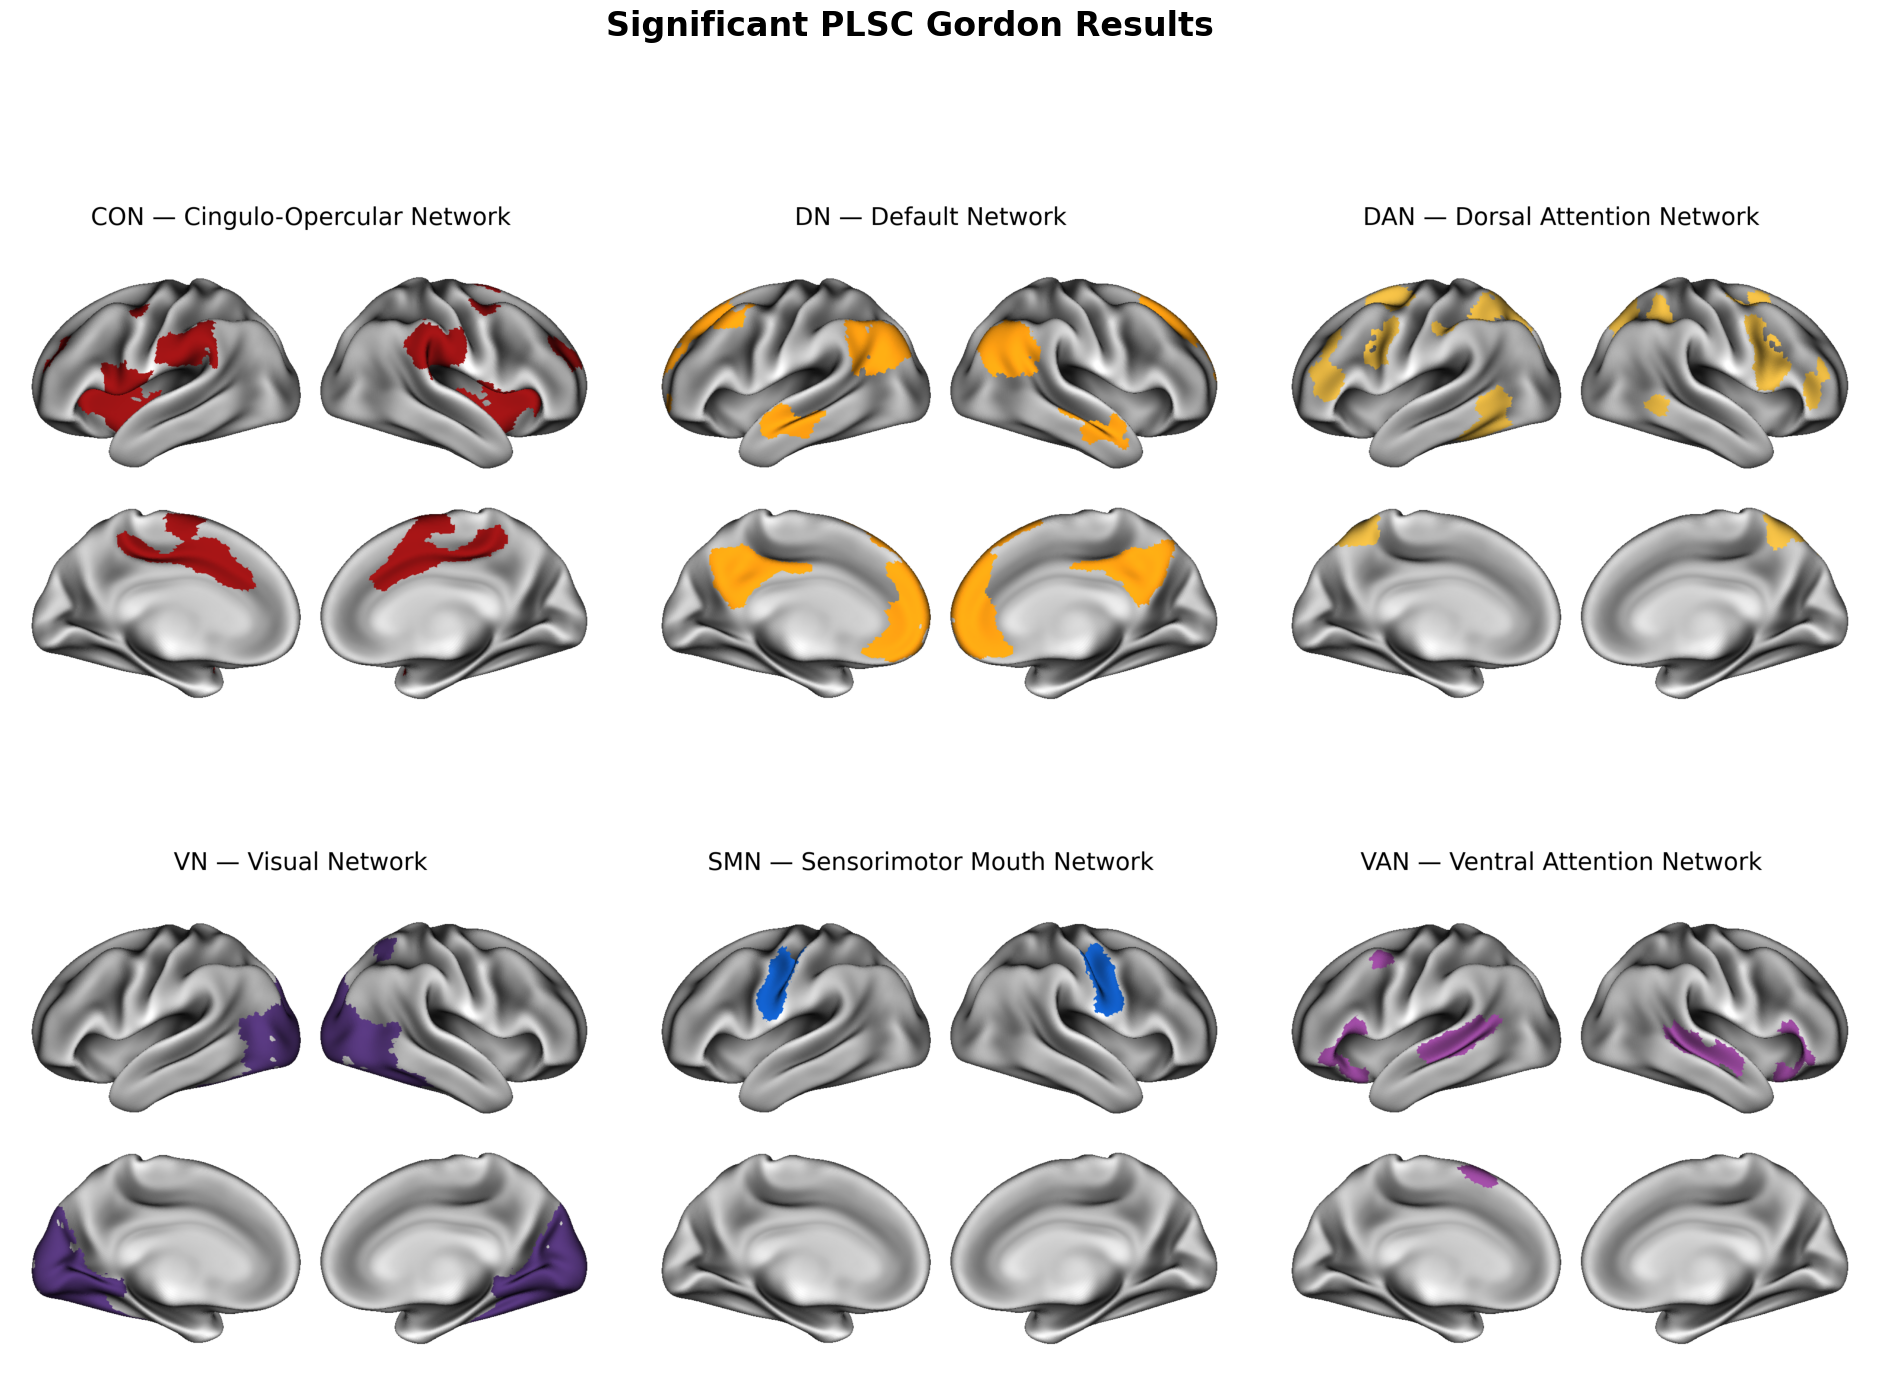

In [11]:
# Combine the 6 individual PNG files into a single 2x3 grid image

print("Creating composite image from individual PNG files...")

# Create a figure with 2x3 subplots
fig = plt.figure(figsize=(24, 16))
fig.suptitle("Significant PLSC Gordon Results", fontsize=24, fontweight='bold')

# Create grid
gs = gridspec.GridSpec(2, 3, figure=fig, hspace=0.1, wspace=0.05)

# Load and display each PNG image
for i, net in enumerate(networks):
    network_name = network_map[net]  # Formal name for display
    file_name = network_file_map[net]  # File-safe name for loading
    png_path = join(fig_dir, f"{file_name}_surface_plot.png")
    
    row, col = i // 3, i % 3
    ax = fig.add_subplot(gs[row, col])

    # Load the PNG image
    img = Image.open(png_path)
    ax.imshow(img)
    ax.axis('off')  # Remove axes for cleaner look

plt.tight_layout()

# Save the composite image
composite_filename = "Significant_Gordon_Nets.png"
composite_path = join(fig_dir, composite_filename)
fig.savefig(composite_path, dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print(f"✓ Saved composite 2x3 grid image to {composite_path}")

plt.show()

Creating custom composite images...

Creating networks-dim1.png...
✓ Added CinguloOpercular_Default_combined_surface_plot.png to top row
✓ Added Default_surface_plot.png to top row
✓ Added Default_DorsalAttention_combined_surface_plot.png to bottom row
✓ Added Default_Visual_combined_surface_plot.png to bottom row
✓ Added Visual_surface_plot.png to bottom row


/var/folders/w7/tr80j6dx7kz1xqvddnxtqtzr0000gn/T/ipykernel_12909/1375989498.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Saved networks-dim1.png to ./derivatives/none-reduced/figures/networks-dim1.png


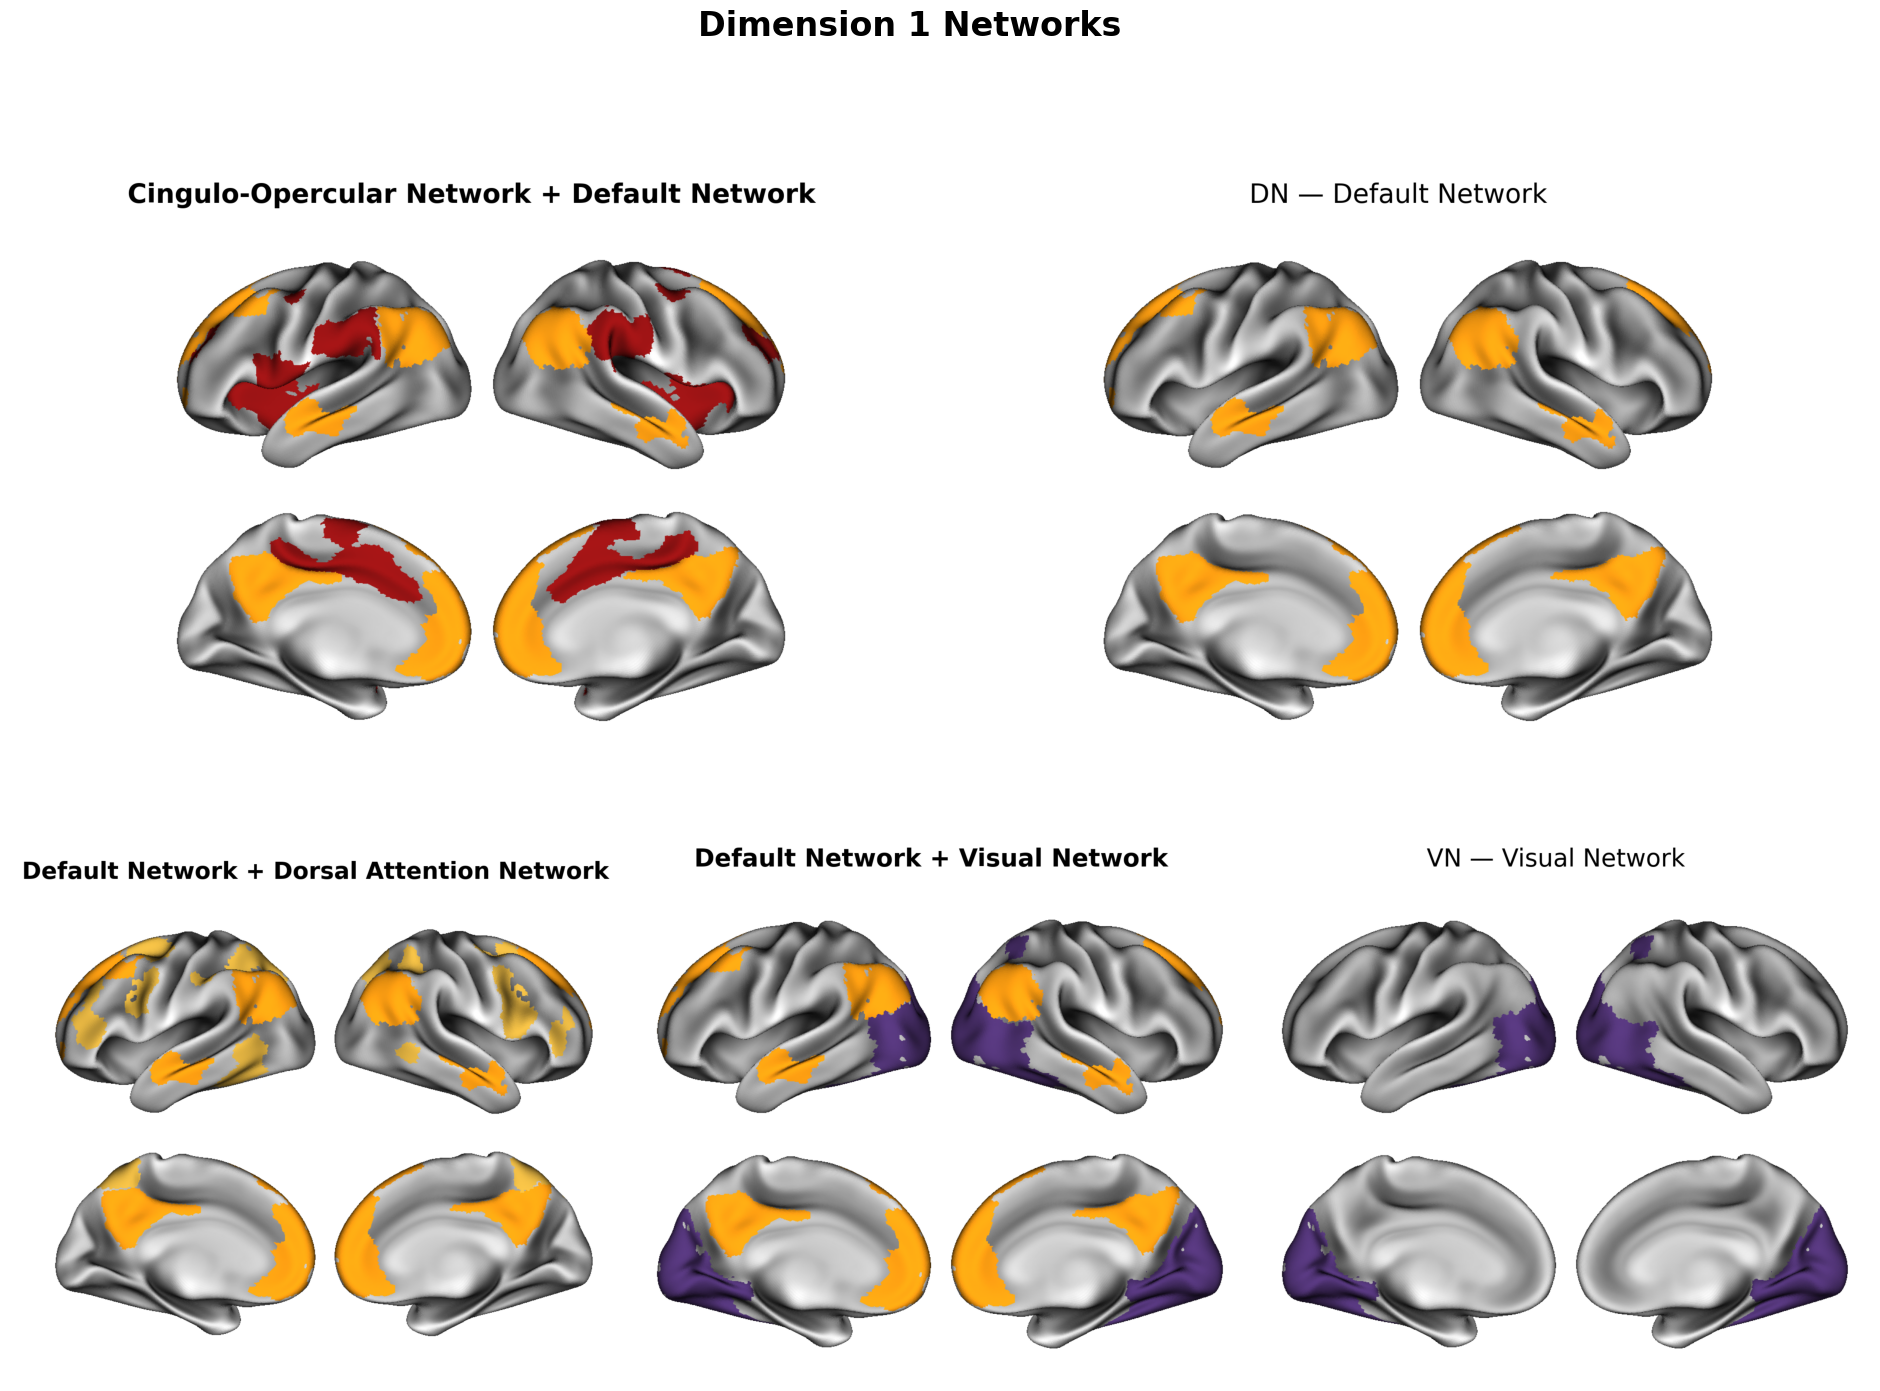


Creating networks-dim3.png...
✓ Added Default_Sensorimotor_combined_surface_plot.png
✓ Added VentralAttention_Visual_combined_surface_plot.png


/var/folders/w7/tr80j6dx7kz1xqvddnxtqtzr0000gn/T/ipykernel_12909/1375989498.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Saved networks-dim3.png to ./derivatives/none-reduced/figures/networks-dim3.png


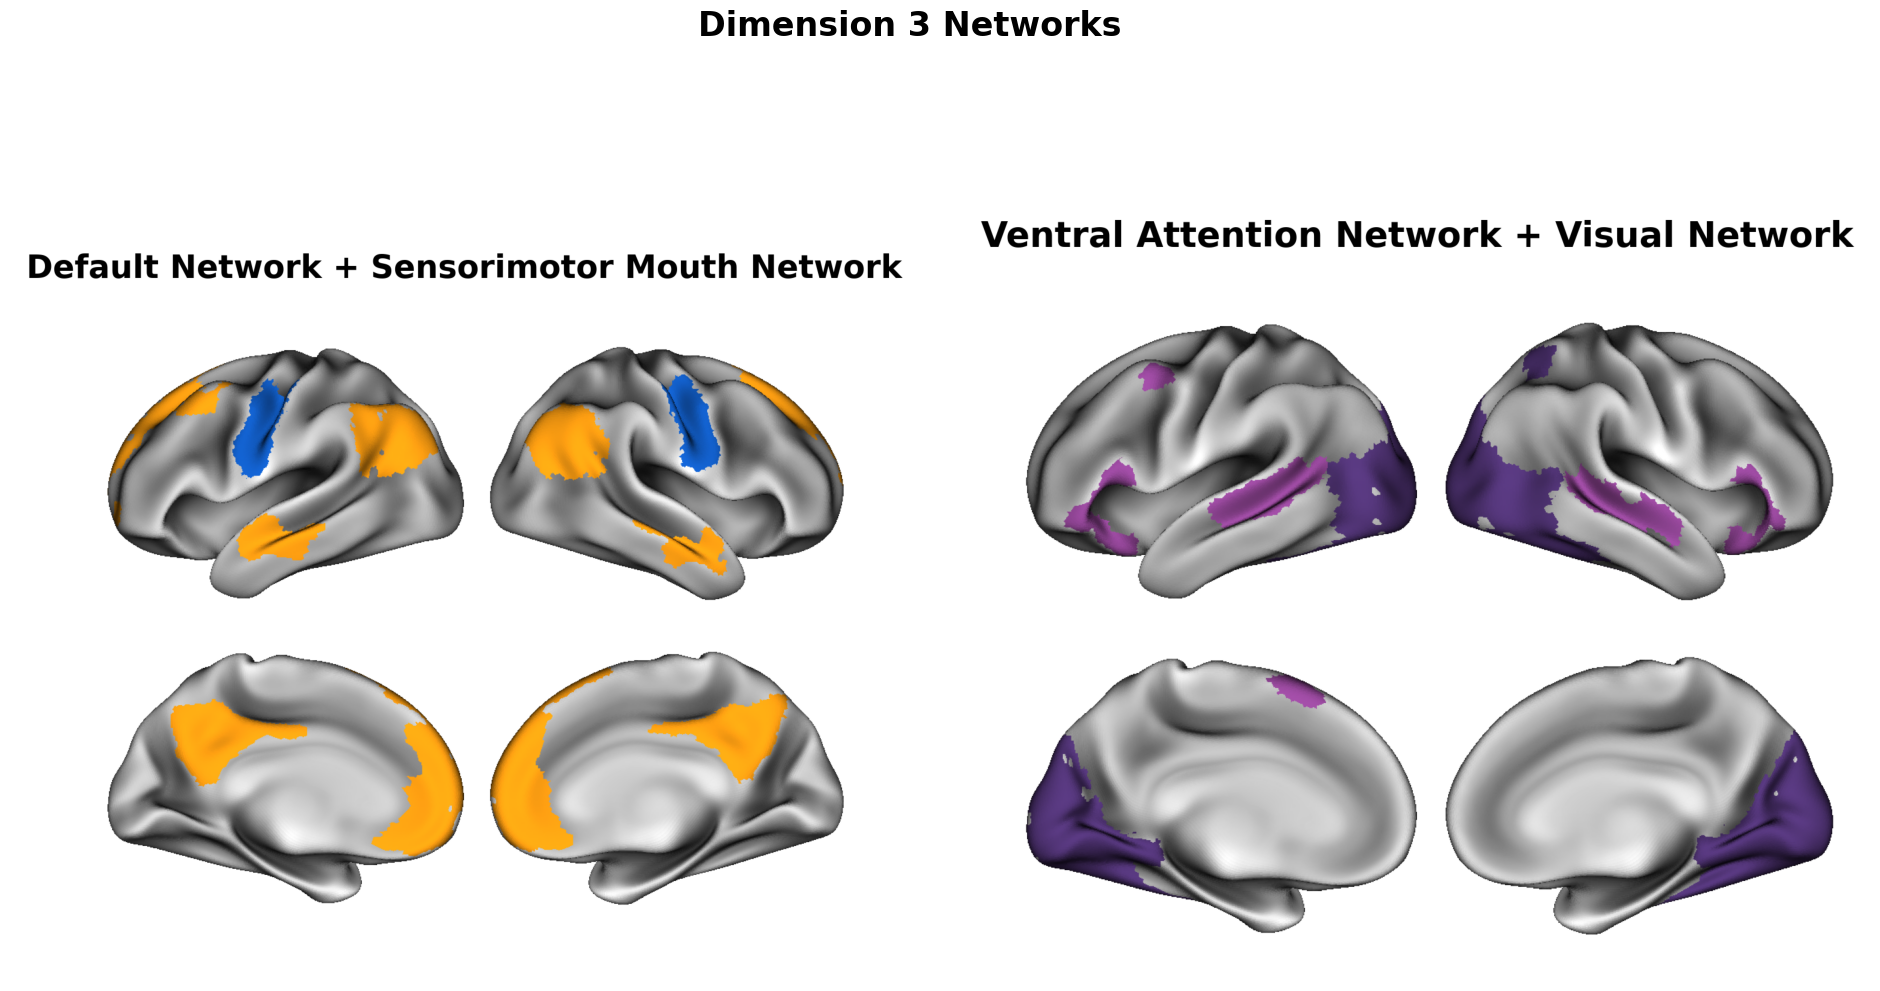


✓ Completed creation of both custom composite images!


In [12]:
# Create custom composite images for dimension 1 and dimension 3 networks
print("Creating custom composite images...")

# Define the images for networks-dim1.png (2x3 layout: 2 on top, 3 on bottom)
dim1_images = [
    "CinguloOpercular_Default_combined_surface_plot.png",  # Top row, left
    "Default_surface_plot.png",                           # Top row, right
    "Default_DorsalAttention_combined_surface_plot.png",  # Bottom row, left
    "Default_Visual_combined_surface_plot.png",           # Bottom row, center
    "Visual_surface_plot.png"                             # Bottom row, right
]

# Define the images for networks-dim3.png (1x2 layout: 2 side by side)
dim3_images = [
    "Default_Sensorimotor_combined_surface_plot.png",     # Left
    "VentralAttention_Visual_combined_surface_plot.png"   # Right
]

# Create networks-dim1.png with 2x3 layout
print("\nCreating networks-dim1.png...")
fig = plt.figure(figsize=(24, 16))
fig.suptitle("Dimension 1 Networks", fontsize=24, fontweight='bold')

# Create custom grid: 2 columns for top row, 3 columns for bottom row
gs = gridspec.GridSpec(2, 6, figure=fig, hspace=0.1, wspace=0.05)

# Top row: 2 images (spanning 3 columns each)
for i in range(2):
    img_path = join(fig_dir, dim1_images[i])
    if exists(img_path):
        col_start = i * 3
        col_end = col_start + 3
        ax = fig.add_subplot(gs[0, col_start:col_end])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        print(f"✓ Added {dim1_images[i]} to top row")
    else:
        print(f"⚠ Warning: {img_path} not found")

# Bottom row: 3 images (spanning 2 columns each)
for i in range(3):
    img_path = join(fig_dir, dim1_images[i + 2])
    if exists(img_path):
        col_start = i * 2
        col_end = col_start + 2
        ax = fig.add_subplot(gs[1, col_start:col_end])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        print(f"✓ Added {dim1_images[i + 2]} to bottom row")
    else:
        print(f"⚠ Warning: {img_path} not found")

plt.tight_layout()

# Save networks-dim1.png
dim1_filename = "networks-dim1.png"
dim1_path = join(fig_dir, dim1_filename)
fig.savefig(dim1_path, dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print(f"✓ Saved {dim1_filename} to {dim1_path}")
plt.show()

# Create networks-dim3.png with 1x2 layout
print("\nCreating networks-dim3.png...")
fig = plt.figure(figsize=(24, 12))
fig.suptitle("Dimension 3 Networks", fontsize=24, fontweight='bold')

# Create grid for 2 side-by-side images
gs = gridspec.GridSpec(1, 2, figure=fig, hspace=0.1, wspace=0.05)

# Add the 2 images side by side
for i, img_name in enumerate(dim3_images):
    img_path = join(fig_dir, img_name)
    if exists(img_path):
        ax = fig.add_subplot(gs[0, i])
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        print(f"✓ Added {img_name}")
    else:
        print(f"⚠ Warning: {img_path} not found")

plt.tight_layout()

# Save networks-dim3.png
dim3_filename = "networks-dim3.png"
dim3_path = join(fig_dir, dim3_filename)
fig.savefig(dim3_path, dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
print(f"✓ Saved {dim3_filename} to {dim3_path}")
plt.show()

print("\n✓ Completed creation of both custom composite images!")

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Creating combined network visualizations...

Creating combined visualization: Cingulo-Opercular Network + Default Network
✓ Saved Cingulo-Opercular Network + Default Network surface plot to ./derivatives/none-reduced/figures/CinguloOpercular_Default_combined_surface_plot.png
✓ Saved Cingulo-Opercular Network + Default Network surface plot to ./derivatives/none-reduced/figures/CinguloOpercular_Default_combined_surface_plot.png


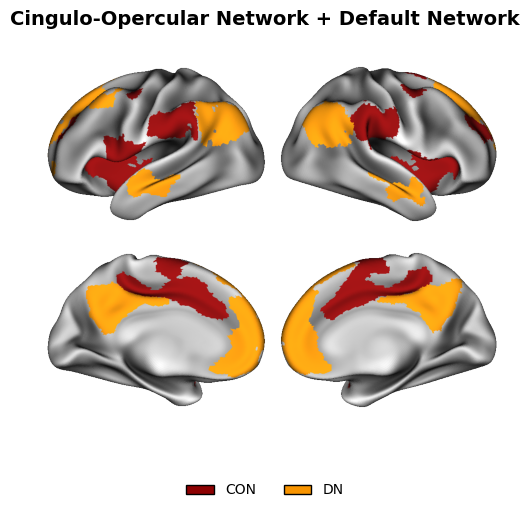

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Default Network + Dorsal Attention Network
✓ Saved Default Network + Dorsal Attention Network surface plot to ./derivatives/none-reduced/figures/Default_DorsalAttention_combined_surface_plot.png
✓ Saved Default Network + Dorsal Attention Network surface plot to ./derivatives/none-reduced/figures/Default_DorsalAttention_combined_surface_plot.png


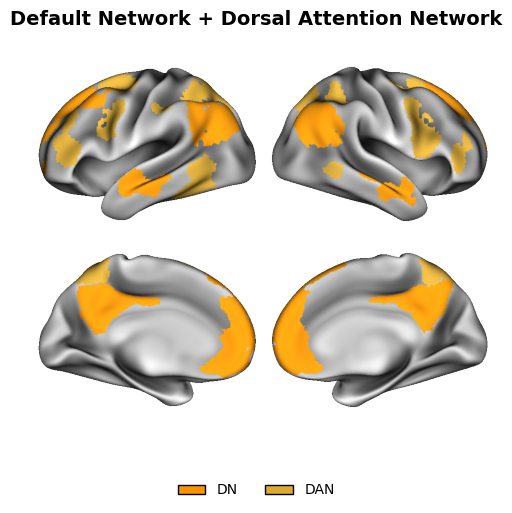

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Default Network + Visual Network
✓ Saved Default Network + Visual Network surface plot to ./derivatives/none-reduced/figures/Default_Visual_combined_surface_plot.png
✓ Saved Default Network + Visual Network surface plot to ./derivatives/none-reduced/figures/Default_Visual_combined_surface_plot.png


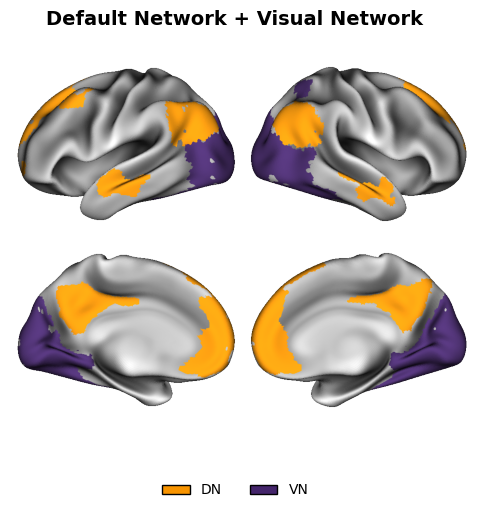

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Default Network + Sensorimotor Mouth Network
✓ Saved Default Network + Sensorimotor Mouth Network surface plot to ./derivatives/none-reduced/figures/Default_Sensorimotor_combined_surface_plot.png
✓ Saved Default Network + Sensorimotor Mouth Network surface plot to ./derivatives/none-reduced/figures/Default_Sensorimotor_combined_surface_plot.png


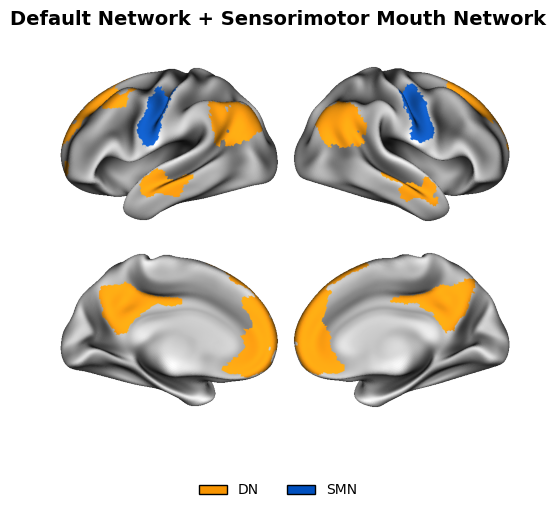

sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348



Creating combined visualization: Ventral Attention Network + Visual Network
✓ Saved Ventral Attention Network + Visual Network surface plot to ./derivatives/none-reduced/figures/VentralAttention_Visual_combined_surface_plot.png
✓ Saved Ventral Attention Network + Visual Network surface plot to ./derivatives/none-reduced/figures/VentralAttention_Visual_combined_surface_plot.png


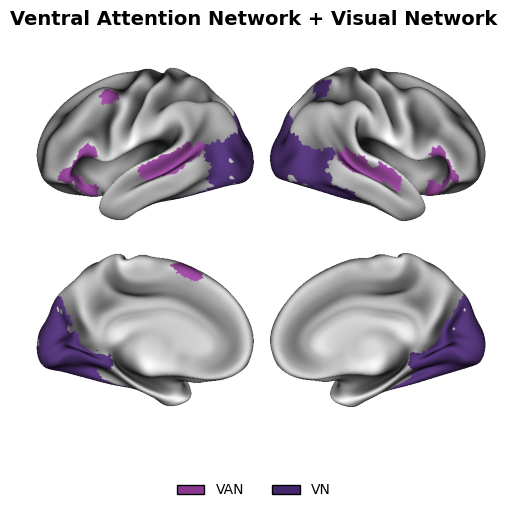

In [13]:
print("Creating combined network visualizations...")


# Define all network pairs to visualize
network_pairs = [
    (10, 1),   # Cingulo-Opercular + Default
    (1, 13),   # Default + Dorsal Attention
    (1, 4),    # Default + Visual
    (1, 3),    # Default + Sensorimotor
    (11, 4)    # Ventral Attention + Visual
]

# Get surfaces once
surfaces = fetch_fslr(density="32k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces["sulc"]

for net1, net2 in network_pairs:
    print(f"\nCreating combined visualization: {network_map[net1]} + {network_map[net2]}")
    
    # Create individual binary masks for each network
    net1_volume = np.zeros_like(data)
    net2_volume = np.zeros_like(data)
    
    net1_volume[data == net1] = 1
    net2_volume[data == net2] = 1
    
    # Create NIfTI images for each network
    net1_img = nib.Nifti1Image(net1_volume, affine, hdr)
    net2_img = nib.Nifti1Image(net2_volume, affine, hdr)
    
    # Transform both networks to surface space
    net1_lh, net1_rh = transforms.mni152_to_fslr(net1_img, fslr_density="32k")
    net1_lh, net1_rh = _zero_medial_wall(net1_lh, net1_rh, space="fsLR", density="32k")
    
    net2_lh, net2_rh = transforms.mni152_to_fslr(net2_img, fslr_density="32k")
    net2_lh, net2_rh = _zero_medial_wall(net2_lh, net2_rh, space="fsLR", density="32k")
    
    # Create plot with multiple layers
    p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")
    
    # Add sulcal depth as base layer
    p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)
    
    # Add first network layer
    p.add_layer(
        {"left": net1_lh, "right": net1_rh},
        cmap=network_colors[net1],
        cbar=False,
        color_range=(0, 1),
    )
    
    # Add second network layer
    p.add_layer(
        {"left": net2_lh, "right": net2_rh},
        cmap=network_colors[net2],
        cbar=False,
        color_range=(0, 1),
    )
    
    # Build the figure
    fig = p.build()
    
    # Create title with network names and colors
    net1_name = network_map[net1].split(' (')[0]  # Remove abbreviation
    net2_name = network_map[net2].split(' (')[0]  # Remove abbreviation
    
    fig.suptitle(f"{net1_name} + {net2_name}", 
                 y=0.95, fontsize=14, fontweight='bold')
    
    # Save the combined visualization
    net1_file = network_file_map[net1]
    net2_file = network_file_map[net2]
    combined_filename = f"{net1_file}_{net2_file}_combined_surface_plot.png"
    combined_path = join(fig_dir, combined_filename)

    # Add a legend using each network's canonical abbreviation (sample cmap at midpoint)
    from matplotlib.patches import Patch
    legend_handles = []
    legend_labels = []
    for n in (net1, net2):
        cmap = network_colors.get(n)
        # if cmap is a matplotlib colormap, sample its midpoint
        color = cmap(0.5) if hasattr(cmap, '__call__') else cmap
        legend_handles.append(Patch(facecolor=color, edgecolor='black'))
        legend_labels.append(network_abbrev.get(n, network_map.get(n, f"Network {n}").split(' (')[0]))

    # Place legend below the figure
    fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center',
               ncol=len(legend_handles), frameon=False, bbox_to_anchor=(0.5, -0.05))

    fig.savefig(combined_path, dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    print(f"✓ Saved {net1_name} + {net2_name} surface plot to {combined_path}")
    
    plt.show()


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Creating combined multi-network visualization for dimension 1..
Adding Default Network to combined visualization...
Adding Cingulo-Opercular Network to combined visualization...
Adding Dorsal Attention Network to combined visualization...
Adding Visual Network to combined visualization...
Adding layer for Default Network
Adding layer for Cingulo-Opercular Network


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Adding layer for Dorsal Attention Network
Adding layer for Visual Network
✓ Saved combined surface plot to ./derivatives/none-reduced/figures/Gordon_Network_dim1.png
✓ Saved combined surface plot to ./derivatives/none-reduced/figures/Gordon_Network_dim1.png


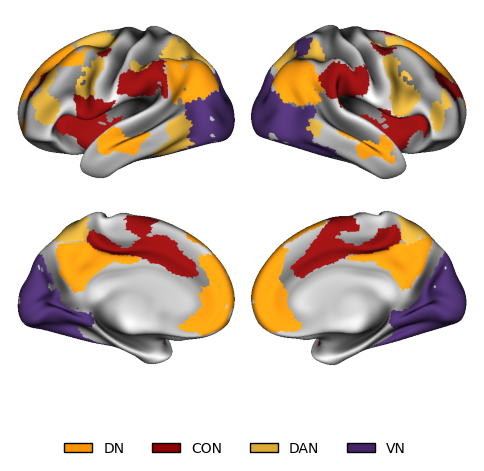

In [17]:
print("Creating combined multi-network visualization for dimension 1..")

# Define the networks to include in the combined plot
networks_to_combine = [1, 10, 13, 4] 

# Get surfaces once
surfaces = fetch_fslr(density="32k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces["sulc"]

# Initialize empty arrays for combined volume
combined_volume = np.zeros_like(data)

# Loop through each network and add it to the combined mask
for net in networks_to_combine:
    print(f"Adding {network_map[net]} to combined visualization...")
    mask = np.zeros_like(data)
    mask[data == net] = 1
    combined_volume += mask  # Overlapping areas will be >1, which is fine for now

# Transform combined volume to surface space
combined_img = nib.Nifti1Image(combined_volume, affine, hdr)
lh_data, rh_data = transforms.mni152_to_fslr(combined_img, fslr_density="32k")
lh_data, rh_data = _zero_medial_wall(lh_data, rh_data, space="fsLR", density="32k")

# Create base plot
p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")

# Add sulcal depth as background
p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)

# Add each network as a separate overlay layer
for net in networks_to_combine:
    print(f"Adding layer for {network_map[net]}")
    
    mask = np.zeros_like(data)
    mask[data == net] = 1
    mask_img = nib.Nifti1Image(mask, affine, hdr)
    lh_net, rh_net = transforms.mni152_to_fslr(mask_img, fslr_density="32k")
    lh_net, rh_net = _zero_medial_wall(lh_net, rh_net, space="fsLR", density="32k")
    
    p.add_layer(
        {"left": lh_net, "right": rh_net},
        cmap=network_colors[net],
        cbar=False,
        color_range=(0, 1),
    )

# Build and label figure
fig = p.build()

# Create title from network names
network_names = [network_map[n].split(' (')[0] for n in networks_to_combine]
#title_str = " + ".join(network_names)

#fig.suptitle(title_str, y=0.95, fontsize=14, fontweight='bold')

# Add a legend using each network's canonical color (sample cmap at midpoint)
from matplotlib.patches import Patch
legend_handles = []
legend_labels = []
for n in networks_to_combine:
    cmap = network_colors.get(n)
    # if cmap is a matplotlib colormap, sample its midpoint
    color = cmap(0.5) if hasattr(cmap, '__call__') else cmap
    legend_handles.append(Patch(facecolor=color, edgecolor='black'))
    legend_labels.append(network_abbrev.get(n, network_map.get(n, f"Network {n}").split(' (')[0]))

# Place legend below the figure
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center',
           ncol=len(legend_handles), frameon=False, bbox_to_anchor=(0.5, -0.05))

# Save figure
combined_filename = "Gordon_Network_dim1.png"
combined_path = join(fig_dir, combined_filename)
fig.savefig(combined_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')

print(f"✓ Saved combined surface plot to {combined_path}")

plt.show()


sizeof_hdr should be 348; set sizeof_hdr to 348


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Creating combined multi-network visualization for dimension 3..
Adding Default Network to combined visualization...
Adding Sensorimotor Mouth Network to combined visualization...
Adding Ventral Attention Network to combined visualization...
Adding Visual Network to combined visualization...
Adding layer for Default Network
Adding layer for Sensorimotor Mouth Network


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Adding layer for Ventral Attention Network
Adding layer for Visual Network
✓ Saved combined surface plot to ./derivatives/none-reduced/figures/Gordon_Network_dim3.png
✓ Saved combined surface plot to ./derivatives/none-reduced/figures/Gordon_Network_dim3.png


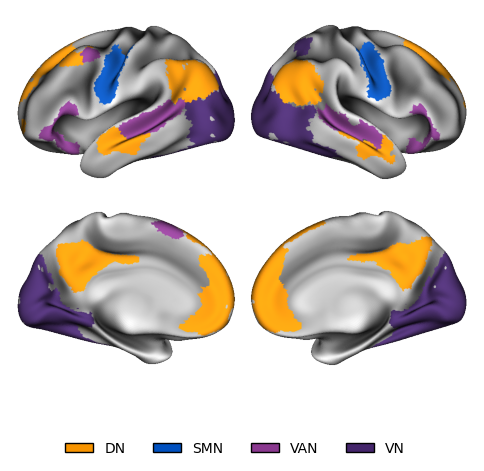

In [14]:
print("Creating combined multi-network visualization for dimension 3..")

# Define the networks to include in the combined plot
networks_to_combine = [1, 3, 11, 4]  # Default, Sensorimotor, Ventral Attention, Visual

# Get surfaces once
surfaces = fetch_fslr(density="32k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces["sulc"]

# Initialize empty arrays for combined volume
combined_volume = np.zeros_like(data)

# Loop through each network and add it to the combined mask
for net in networks_to_combine:
    print(f"Adding {network_map[net]} to combined visualization...")
    mask = np.zeros_like(data)
    mask[data == net] = 1
    combined_volume += mask  # Overlapping areas will be >1, which is fine for now

# Transform combined volume to surface space
combined_img = nib.Nifti1Image(combined_volume, affine, hdr)
lh_data, rh_data = transforms.mni152_to_fslr(combined_img, fslr_density="32k")
lh_data, rh_data = _zero_medial_wall(lh_data, rh_data, space="fsLR", density="32k")

# Create base plot
p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")

# Add sulcal depth as background
p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)

# Add each network as a separate overlay layer
for net in networks_to_combine:
    print(f"Adding layer for {network_map[net]}")
    
    mask = np.zeros_like(data)
    mask[data == net] = 1
    mask_img = nib.Nifti1Image(mask, affine, hdr)
    lh_net, rh_net = transforms.mni152_to_fslr(mask_img, fslr_density="32k")
    lh_net, rh_net = _zero_medial_wall(lh_net, rh_net, space="fsLR", density="32k")
    
    p.add_layer(
        {"left": lh_net, "right": rh_net},
        cmap=network_colors[net],
        cbar=False,
        color_range=(0, 1),
    )

# Build and label figure
fig = p.build()

# Create title from network names
network_names = [network_map[n].split(' (')[0] for n in networks_to_combine]
#title_str = " + ".join(network_names)

#fig.suptitle(title_str, y=0.95, fontsize=14, fontweight='bold')

# Add a legend using each network's canonical color (sample cmap at midpoint)
from matplotlib.patches import Patch
legend_handles = []
legend_labels = []
for n in networks_to_combine:
    cmap = network_colors.get(n)
    # if cmap is a matplotlib colormap, sample its midpoint
    color = cmap(0.5) if hasattr(cmap, '__call__') else cmap
    legend_handles.append(Patch(facecolor=color, edgecolor='black'))
    legend_labels.append(network_abbrev.get(n, network_map.get(n, f"Network {n}").split(' (')[0]))

# Place legend below the figure
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center',
           ncol=len(legend_handles), frameon=False, bbox_to_anchor=(0.5, -0.05))

# Save figure
combined_filename = "Gordon_Network_dim3.png"
combined_path = join(fig_dir, combined_filename)
fig.savefig(combined_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')

print(f"✓ Saved combined surface plot to {combined_path}")

plt.show()


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Creating combined multi-network visualization with all gordon networks...
Adding Auditory Network to combined visualization...
Adding Cingulo-Opercular Network to combined visualization...
Adding Cingulo-Parietal Network to combined visualization...
Adding Default Network to combined visualization...
Adding Dorsal Attention Network to combined visualization...
Adding Fronto-Parietal Network to combined visualization...
Adding Retrosplenial Temporal Network to combined visualization...
Adding Sensorimotor Hand Network to combined visualization...
Adding Sensorimotor Mouth Network to combined visualization...
Adding Salience Network to combined visualization...
Adding Ventral Attention Network to combined visualization...
Adding Visual Network to combined visualization...
Adding layer for Auditory Network
Adding layer for Cingulo-Opercular Network


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Adding layer for Cingulo-Parietal Network
Adding layer for Default Network
Adding layer for Dorsal Attention Network
Adding layer for Fronto-Parietal Network
Adding layer for Retrosplenial Temporal Network
Adding layer for Sensorimotor Hand Network
Adding layer for Sensorimotor Mouth Network


sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348
sizeof_hdr should be 348; set sizeof_hdr to 348


Adding layer for Salience Network
Adding layer for Ventral Attention Network
Adding layer for Visual Network
✓ Saved combined surface plot to ./derivatives/none-reduced/figures/Gordon_Network_Plot_legend.png
✓ Saved combined surface plot to ./derivatives/none-reduced/figures/Gordon_Network_Plot_legend.png


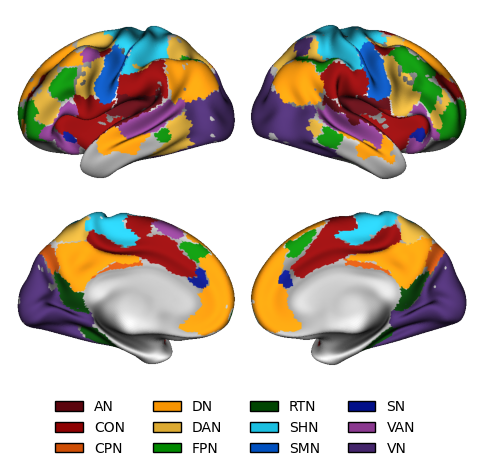

In [18]:
print("Creating combined multi-network visualization with all gordon networks...")

# Define the networks to include in the combined plot (ALL Gordon networks)
# Full set order: [6, 10, 8, 1, 13, 5, 9, 2, 3, 12, 11, 4]
networks_to_combine = [6, 10, 8, 1, 13, 5, 9, 2, 3, 12, 11, 4]  

# Get surfaces once
surfaces = fetch_fslr(density="32k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces["sulc"]

# Initialize empty arrays for combined volume
combined_volume = np.zeros_like(data)

# Loop through each network and add it to the combined mask
for net in networks_to_combine:
    print(f"Adding {network_map[net]} to combined visualization...")
    mask = np.zeros_like(data)
    mask[data == net] = 1
    combined_volume += mask  # Overlapping areas will be >1, which is fine for now

# Transform combined volume to surface space
combined_img = nib.Nifti1Image(combined_volume, affine, hdr)
lh_data, rh_data = transforms.mni152_to_fslr(combined_img, fslr_density="32k")
lh_data, rh_data = _zero_medial_wall(lh_data, rh_data, space="fsLR", density="32k")

# Create base plot
p = Plot(surf_lh=lh, surf_rh=rh, layout="grid")

# Add sulcal depth as background
p.add_layer({"left": sulc_lh, "right": sulc_rh}, cmap="binary_r", cbar=False)

# Add each network as a separate overlay layer
for net in networks_to_combine:
    print(f"Adding layer for {network_map[net]}")
    
    mask = np.zeros_like(data)
    mask[data == net] = 1
    mask_img = nib.Nifti1Image(mask, affine, hdr)
    lh_net, rh_net = transforms.mni152_to_fslr(mask_img, fslr_density="32k")
    lh_net, rh_net = _zero_medial_wall(lh_net, rh_net, space="fsLR", density="32k")
    
    p.add_layer(
        {"left": lh_net, "right": rh_net},
        cmap=network_colors[net],
        cbar=False,
        color_range=(0, 1),
    )

# Build and label figure
fig = p.build()

# Create title from network names
network_names = [network_map[n].split(' (')[0] for n in networks_to_combine]
#title_str = " + ".join(network_names)

#fig.suptitle(title_str, y=0.95, fontsize=14, fontweight='bold')

# Add a legend using each network's canonical color (sample cmap at midpoint)
from matplotlib.patches import Patch
legend_handles = []
legend_labels = []
for n in networks_to_combine:
    cmap = network_colors.get(n)
    # if cmap is a matplotlib colormap, sample its midpoint
    color = cmap(0.5) if hasattr(cmap, '__call__') else cmap
    legend_handles.append(Patch(facecolor=color, edgecolor='black'))
    legend_labels.append(network_abbrev.get(n, network_map.get(n, f"Network {n}").split(' (')[0]))

# Place legend below the figure
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower center',
           ncol=4, frameon=False, bbox_to_anchor=(0.5, -0.05))

# Save figure: use a single consolidated filename for the full Gordon network plot
combined_filename = "Gordon_Network_Plot_legend.png"
combined_path = join(fig_dir, combined_filename)
fig.savefig(combined_path, dpi=300, bbox_inches='tight', facecolor='white', edgecolor='none')

print(f"✓ Saved combined surface plot to {combined_path}")

plt.show()


## Plotting the bootstrap scores on one brain

In [16]:
rsi_bootdf = pd.read_csv("./derivatives/none-reduced/rni-brain_P-components.csv")
sociocult_bootdf = pd.read_csv("./derivatives/none-reduced/rni-sociocult_Q-components.csv")
variable_df = pd.read_csv("./variable_to_nifti_mapping.csv")

print(rsi_bootdf)

FileNotFoundError: [Errno 2] No such file or directory: './variable_to_nifti_mapping.csv'

In [ ]:
# Rename the first column in rsi_bootdf to match variable_df column name (
rsi_bootdf = rsi_bootdf.rename(columns={rsi_bootdf.columns[0]: "Variable"})
variable_df = variable_df.rename(columns={variable_df.columns[0]: "Variable"})

# Keep only the 'Variable' and 'atlas_value' columns
rsi_bootdf = rsi_bootdf[["Variable", "Dimension 1"]]
variable_df = variable_df[["Variable", "atlas_value"]]

# Merge rsi_bootdf with variable_df on 'Variable'
merged_df = pd.merge(rsi_bootdf, variable_df, on="Variable", how="left")

print(merged_df.head())

                   Variable  Dimension 1  atlas_value
0  rsfmri_c_ngd_cgc_ngd_cgc     2.031047         10.0
1   rsfmri_c_ngd_cgc_ngd_ca    -0.729915         10.0
2   rsfmri_c_ngd_cgc_ngd_dt    -3.130818         10.0
3  rsfmri_c_ngd_cgc_ngd_dla     1.734342         10.0
4   rsfmri_c_ngd_cgc_ngd_fo    -2.296964         10.0


sizeof_hdr should be 348; set sizeof_hdr to 348
/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_40491/537859404.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=-1, h_pad=-1)


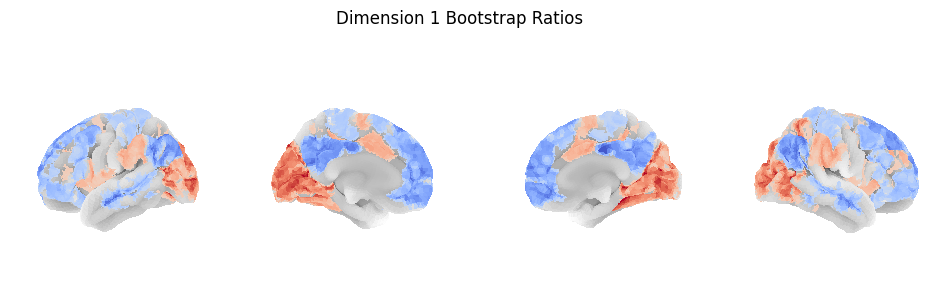

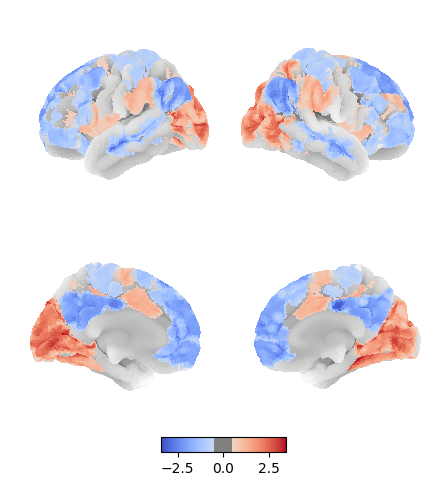

In [ ]:

# Load fsaverage surface
surf = datasets.fetch_surf_fsaverage()

# Load Gordon atlas
gordon_img = nib.load("./gordon_networks_222.nii")
gordon_data = gordon_img.get_fdata()
affine = gordon_img.affine
hdr = gordon_img.header

# Assume merged_df is already loaded and has 'atlas_value' and 'V1' columns

# Create volume to hold V1 values
v1_volume = np.zeros_like(gordon_data)

# Populate volume: set voxel value = V1 score for that atlas_value
for _, row in merged_df.iterrows():
    atlas_val = row["atlas_value"]
    v1_val = row["Dimension 1"]
    if not np.isnan(atlas_val):
        v1_volume[gordon_data == atlas_val] = v1_val

# Convert to NIfTI image
v1_img = nib.Nifti1Image(v1_volume, affine, hdr)

# Define colormap and max value
from matplotlib import cm

cmap = "coolwarm"
vmax = np.abs(merged_df["Dimension 1"]).max()

# Plot
fig_stat, fig_img = plot_surfaces(
    nifti=v1_img,
    surf=surf,
    cmap=cmap,
    vmax=vmax,
    threshold=0.5,  # mask out zeros
)

fig_stat.suptitle("Dimension 1 Bootstrap Ratios", y=0.9)
plt.show()

sizeof_hdr should be 348; set sizeof_hdr to 348
/var/folders/b0/6xxmhnys7hj9g_47_dsjm7c00000gn/T/ipykernel_40491/537859404.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=-1, h_pad=-1)


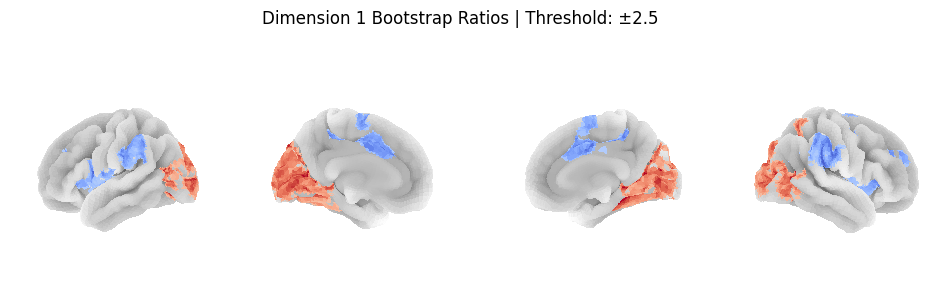

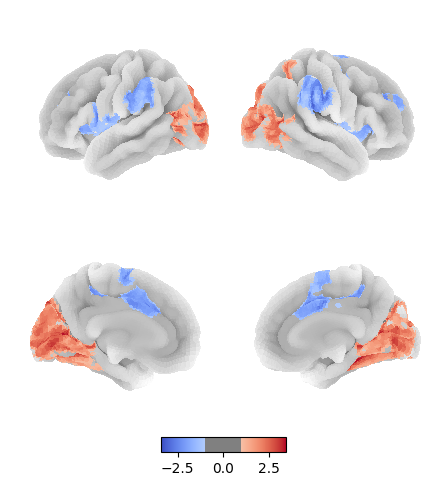

In [ ]:
# Load fsaverage surface
surf = datasets.fetch_surf_fsaverage()

# Load Gordon atlas
gordon_img = nib.load("./gordon_networks_222.nii")
gordon_data = gordon_img.get_fdata()
affine = gordon_img.affine
hdr = gordon_img.header

# Create volume to hold V1 values (initialized to zero)
v1_volume = np.zeros_like(gordon_data)

# Loop through unique atlas values
for atlas_val in merged_df["atlas_value"].dropna().unique():
    # Get all Dimension 1 values for this atlas region
    vals = merged_df.loc[merged_df["atlas_value"] == atlas_val, "Dimension 1"]

    # Filter for bootstrap ratios > 2.5 or < -2.5
    sig_vals = vals[(vals > 2.5) | (vals < -2.5)]

    # If at least one value passes threshold, assign the average to the region
    if not sig_vals.empty:
        mean_val = sig_vals.mean()
        v1_volume[gordon_data == atlas_val] = mean_val

# Convert to NIfTI image
v1_img = nib.Nifti1Image(v1_volume, affine, hdr)

# Define colormap and max value
from matplotlib import cm

cmap = "coolwarm"
vmax = np.abs(merged_df["Dimension 1"]).max()

# Plot 
fig_stat, fig_img = plot_surfaces(
    nifti=v1_img,
    surf=surf,
    cmap=cmap,
    vmax=vmax,
    threshold=1,  # mask out 0s
)

fig_stat.suptitle("Dimension 1 Bootstrap Ratios | Threshold: ±2.5", y=0.9)
plt.show()

## Plot LME

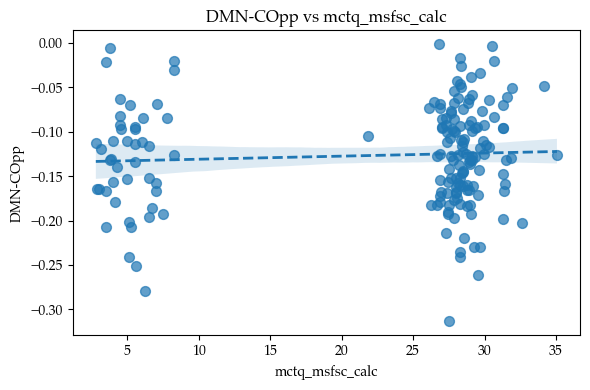

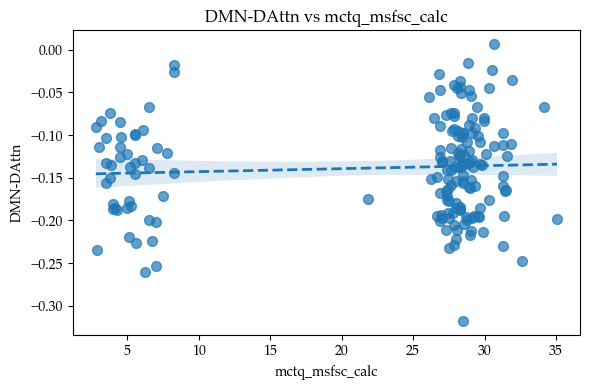

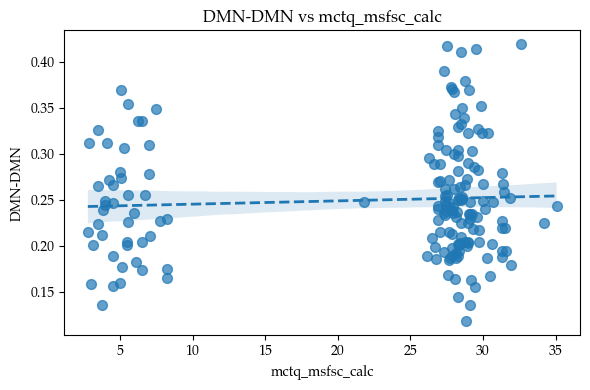

In [ ]:
REG_DIR = "./derivatives/regression"

reg_df = pd.read_csv(join(REG_DIR, "regression.csv"))

rsfc_reg_measures = [
    "rsfmri_c_ngd_cgc_ngd_dt",
    "rsfmri_c_ngd_dt_ngd_dla",
    "rsfmri_c_ngd_dt_ngd_dt",
]

# renamed the abide 2 phenotypes
rsfc_map = {
    "rsfmri_c_ngd_cgc_ngd_dt": "DMN-COpp",
    "rsfmri_c_ngd_dt_ngd_dla": "DMN-DAttn",
    "rsfmri_c_ngd_dt_ngd_dt": "DMN-DMN",
}

# phyhealth_col = "resp_wheeze_yn_y"
phyhealth_col = "mctq_msfsc_calc"

for measure in rsfc_reg_measures:
    pretty = rsfc_map.get(measure, measure)

    plt.figure(figsize=(6, 4))
    sns.regplot(
        x=phyhealth_col,
        y=measure,
        data=reg_df,
        scatter_kws={"alpha": 0.7, "s": 50},
        line_kws={"linewidth": 2, "ls": "--", "clip_on": False},  # <-- important
    )
    plt.xlabel(phyhealth_col, weight="bold")
    plt.ylabel(pretty, weight="bold")
    plt.title(f"{pretty} vs {phyhealth_col}", weight="bold")
    plt.tight_layout()
    plt.show()

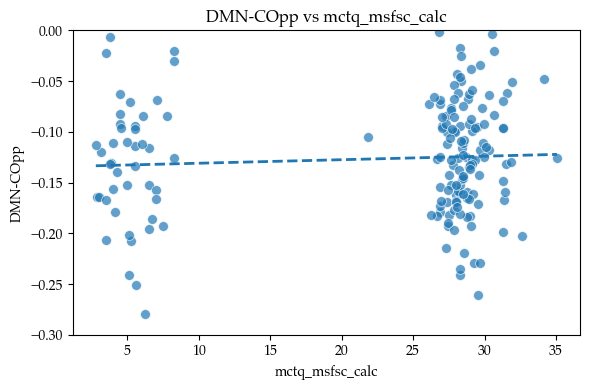

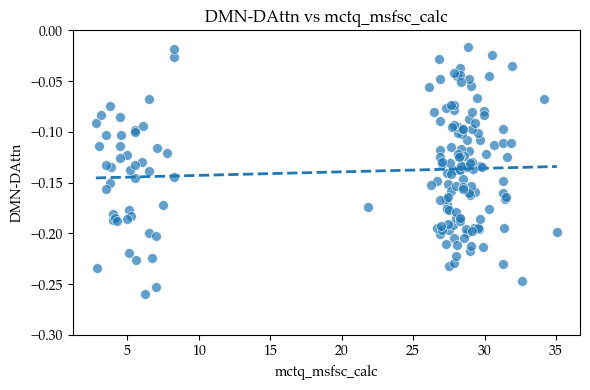

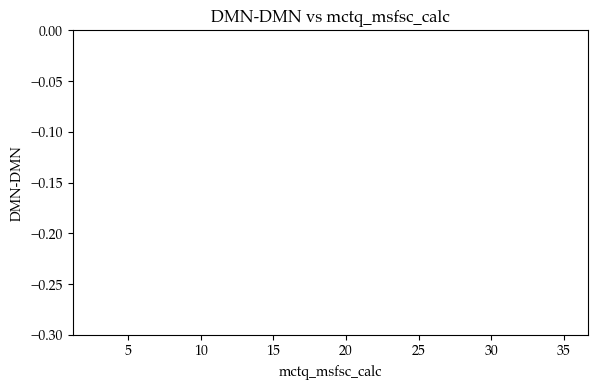

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from scipy.stats import linregress, t
import numpy as np

REG_DIR = "./derivatives/regression"

reg_df = pd.read_csv(join(REG_DIR, "regression.csv"))

rsfc_reg_measures = [
    "rsfmri_c_ngd_cgc_ngd_dt",
    "rsfmri_c_ngd_dt_ngd_dla",
    "rsfmri_c_ngd_dt_ngd_dt",
]

rsfc_map = {
    "rsfmri_c_ngd_cgc_ngd_dt": "DMN-COpp",
    "rsfmri_c_ngd_dt_ngd_dla": "DMN-DAttn",
    "rsfmri_c_ngd_dt_ngd_dt": "DMN-DMN",
}

phyhealth_col = "mctq_msfsc_calc"

# From your R LME output
lme_estimate = 0.00919349452795043  # Slope for mctq_msfsc_calc
lme_intercept = -0.103121027119344  # Intercept
lme_se = 0.00432508649601349  # Std. Error
lme_df = 151.05  # Degrees of freedom

for measure in rsfc_reg_measures:
    pretty = rsfc_map.get(measure, measure)

    x = reg_df[phyhealth_col]
    y = reg_df[measure]

    # Fit OLS regression using all data
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals_ols = intercept + slope * x_vals

    # LME model fit
    y_vals_lme = lme_intercept + lme_estimate * x_vals

    # 95% CI for LME slope
    t_crit = t.ppf(0.975, df=lme_df)
    slope_upper = lme_estimate + t_crit * lme_se
    slope_lower = lme_estimate - t_crit * lme_se
    y_upper = lme_intercept + slope_upper * x_vals
    y_lower = lme_intercept + slope_lower * x_vals

    # Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, alpha=0.7, s=50)

    plt.plot(x_vals, y_vals_ols, "--", linewidth=2, label="OLS Fit")
    plt.plot(x_vals, y_vals_lme, "-", linewidth=2, label="LME Estimate")
    plt.fill_between(
        x_vals, y_lower, y_upper, color="gray", alpha=0.3, label="LME 95% CI"
    )

    plt.xlabel(phyhealth_col, weight="bold")
    plt.ylabel(pretty, weight="bold")
    plt.title(f"{pretty} vs {phyhealth_col}", weight="bold")
    plt.ylim(-0.30, 0.00)
    plt.legend()
    plt.tight_layout()
    plt.show()

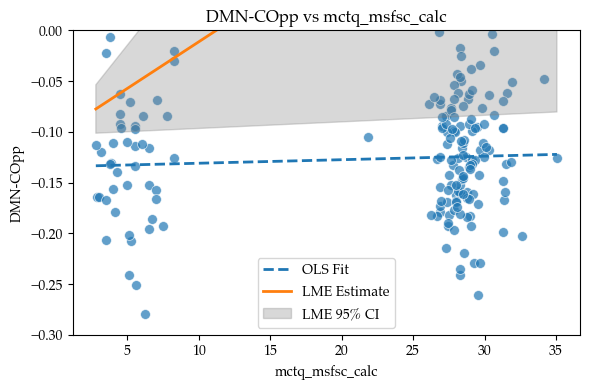

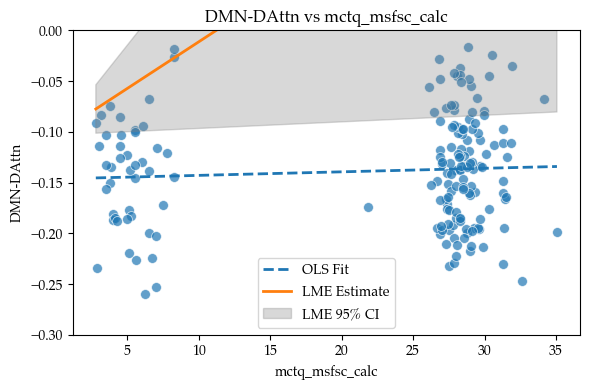

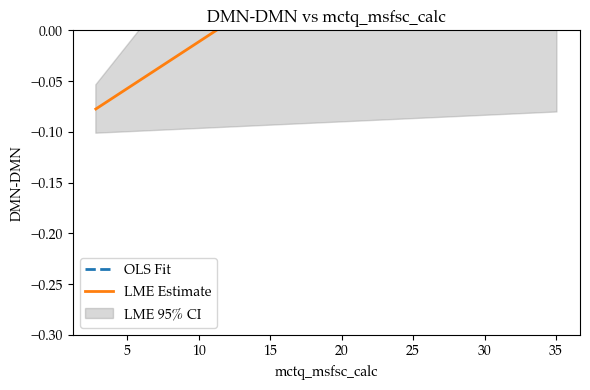

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from scipy.stats import linregress, t
import numpy as np

REG_DIR = "./derivatives/regression"

plt.rcParams["font.family"] = "Palatino"
plt.rcParams["font.weight"] = "bold"

reg_df = pd.read_csv(join(REG_DIR, "regression.csv"))

rsfc_reg_measures = [
    "rsfmri_c_ngd_cgc_ngd_dt",
    "rsfmri_c_ngd_dt_ngd_dla",
    "rsfmri_c_ngd_dt_ngd_dt",
]

rsfc_map = {
    "rsfmri_c_ngd_cgc_ngd_dt": "DMN-COpp",
    "rsfmri_c_ngd_dt_ngd_dla": "DMN-DAttn",
    "rsfmri_c_ngd_dt_ngd_dt": "DMN-DMN",
}

phyhealth_col = "mctq_msfsc_calc"

# From your R LME output
lme_estimate = 0.00919349452795043  # Slope for mctq_msfsc_calc
lme_intercept = -0.103121027119344  # Intercept
lme_se = 0.00432508649601349  # Std. Error
lme_df = 151.05  # Degrees of freedom

for measure in rsfc_reg_measures:
    pretty = rsfc_map.get(measure, measure)

    x = reg_df[phyhealth_col]
    y = reg_df[measure]

    # Fit OLS regression using all data
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals_ols = intercept + slope * x_vals

    # LME model fit
    y_vals_lme = lme_intercept + lme_estimate * x_vals

    # 95% CI for LME slope
    t_crit = t.ppf(0.975, df=lme_df)
    slope_upper = lme_estimate + t_crit * lme_se
    slope_lower = lme_estimate - t_crit * lme_se
    y_upper = lme_intercept + slope_upper * x_vals
    y_lower = lme_intercept + slope_lower * x_vals

    # Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x, y=y, alpha=0.7, s=50)

    plt.plot(x_vals, y_vals_ols, "--", linewidth=2, label="OLS Fit")
    plt.plot(x_vals, y_vals_lme, "-", linewidth=2, label="LME Estimate")
    plt.fill_between(
        x_vals, y_lower, y_upper, color="gray", alpha=0.3, label="LME 95% CI"
    )

    plt.xlabel(phyhealth_col, weight="bold")
    plt.ylabel(pretty, weight="bold")
    plt.title(f"{pretty} vs {phyhealth_col}", weight="bold")
    plt.ylim(-0.30, 0.00)
    plt.legend()
    plt.tight_layout()
    plt.show()